In [117]:
import numpy as np
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import ks_2samp
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.stats import t
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
       

In [42]:
data=pd.read_csv('/Users/rickie/Desktop/statistics_by_python/titanic.csv')
data.info()
df1=data[['embarked','age','fare']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [37]:
df2=data[['embarked','age','fare']].groupby('embarked').agg(['count','min','max','median','mean','var','std'])
df2=df2.applymap(lambda x:'%.2f'%x)
# df2.apply(lambda x:round(x,2))

In [90]:
df2['fare']

,count,min,max,median,mean,var,std
embarked,,,,,,,
C,168.00,4.01,512.33,29.70,59.95,7041.39,83.91
Q,77.00,6.75,90.00,7.75,13.28,201.30,14.19
S,644.00,0.00,263.00,13.00,27.08,1287.95,35.89


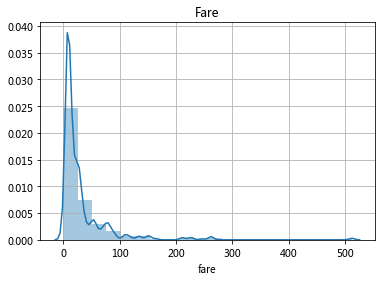

In [141]:
sns.distplot(df1.fare,bins=20)
plt.title('Fare')
plt.grid(True)

#### 1.1 检验fare是否符合卡方分布

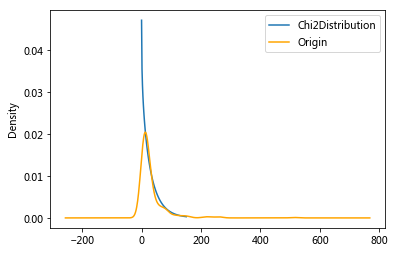

In [143]:
#进行卡方拟合
sample_stat=chi2.fit(df1.fare)

chi2_fit=chi2(sample_stat[0],sample_stat[1],sample_stat[2])
x=np.linspace(chi2_fit.ppf(0.01),chi2_fit.ppf(0.99),100)
x0=np.linspace(chi2.ppf(0.01,sample_stat[0]),chi2.ppf(0.99,sample_stat[0]),100)
plt.plot(x,chi2_fit.pdf(x))
df1.fare.plot(kind='kde',color='orange')
plt.legend(['Chi2Distribution','Origin'])

In [144]:
#卡方分布检验
x2=chi2.rvs(df=sample_stat[0],loc=sample_stat[1],scale=sample_stat[2],size=len(df1))# dof,loc,scale
stats.ks_2samp(x2,df1.fare) #由于p<0.005,因此拒绝原假设，fare不符合卡方分布


Ks_2sampResult(statistic=0.2053872053872054, pvalue=6.073735619930226e-17)

#### 1.2 检验是否符合正态分布

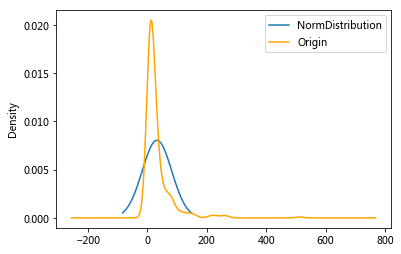

In [138]:
Norm=norm.fit(df1.fare)
M_S=norm(Norm[0],Norm[1])
x=np.linspace(M_S.ppf(0.01),M_S.ppf(0.99),100)
plt.plot(x,M_S.pdf(x))
df1.fare.plot(kind='kde',color='orange')
plt.legend(['NormDistribution','Origin'])

In [145]:
kstest(df1.fare,'norm')
# normaltest(df1.fare,axis=0)

KstestResult(statistic=0.9831349436254704, pvalue=0.0)

#### 1.3检验是否符合t分布

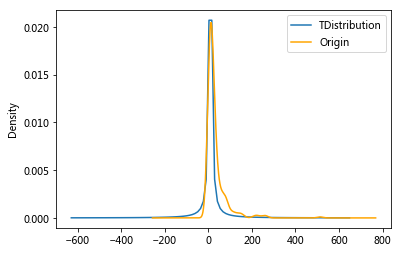

In [135]:
T_model=t.fit(df1.fare)
M_S=t(T_model[0],T_model[1],T_model[2])
x=np.linspace(M_S.ppf(0.01),M_S.ppf(0.99),100)

plt.plot(x,M_S.pdf(x))
df1.fare.plot(kind='kde',color='orange')
plt.legend([ 'TDistribution','Origin'])

##### ks_2samp:This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

In [137]:
x2=t.rvs(df=T_model[0],loc=T_model[1],scale=T_model[2],size=len(df1.fare))# dof,loc,scale
stats.ks_2samp(df1.fare, x2)  

Ks_2sampResult(statistic=0.31537598204264866, pvalue=2.2676716105898464e-39)

In [147]:
df1.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [165]:
S_fare=df1[df1['embarked']=='S'].fare
C_fare=df1[df1['embarked']=='C'].fare
Q_fare=df1[df1['embarked']=='Q'].fare
print(S_fare.describe(),C_fare.describe(),Q_fare.describe())

count    644.000000
mean      27.079812
std       35.887993
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: fare, dtype: float64 count    168.000000
mean      59.954144
std       83.912994
min        4.012500
25%       13.697950
50%       29.700000
75%       78.500025
max      512.329200
Name: fare, dtype: float64 count    77.000000
mean     13.276030
std      14.188047
min       6.750000
25%       7.750000
50%       7.750000
75%      15.500000
max      90.000000
Name: fare, dtype: float64


In [172]:
miu=S_fare.mean()-C_fare.mean()
sigma=np.sqrt(S_fare.var()/len(S_fare)+C_fare.var()/len(C_fare))

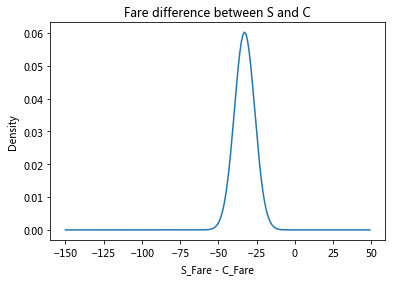

In [177]:
x=np.arange(-150,50)
Norm_d=norm(miu,sigma)
plt.plot(x,Norm_d.pdf(x))
plt.xlabel("S_Fare - C_Fare")
plt.ylabel("Density")
plt.title('Fare difference between S and C')
plt.show()

In [183]:
kstest(S_fare,'norm')
# S_fare.plot(kind='kde')


KstestResult(statistic=0.9767077878825896, pvalue=0.0)